**10 MINUTES TO APPELPY**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm  # for datasets
import matplotlib.pyplot as plt
%matplotlib inline

# Hide Numpy warnings from Statsmodels
import warnings
warnings.filterwarnings('ignore')

**This is a whirlwind tour of Appelpy's functionality:**
- Exploratory data analysis
- Model estimation
- Model diagnostics

Note: this notebook was run using Appelpy v0.4.0.

# Set up model dataset

Let's explore the functionality of Appelpy using one of the most prolific datasets in econometrics: [The California Test Score Data Set](https://rdrr.io/cran/Ecdat/man/Caschool.html) (**Caschool**).

Read the dataset with Pandas and obtain the data via a Statsmodels method.

In [2]:
# Load data
df = sm.datasets.get_rdataset('Caschool', 'Ecdat').data
# Add together the two test scores (total score)
df['scrtot'] = df['readscr'] + df['mathscr']

In [3]:
df.head()

,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr,scrtot
0,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,1381.599976
1,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,1322.400024
2,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,1287.200012
3,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000,1295.400024
4,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024,1281.700012


# Inspect data

Now we have the data, let's find out more about the distributions of some of the key variables before modelling.

Appelpy has an **`eda` module** (exploratory data analysis) with handy methods for getting stats about a dataset.

In [4]:
from appelpy.eda import statistical_moments

Get all the statistical moments in one place:
1. Mean
2. Variance
3. Skewness (Fisher as default)
4. Kurtosis

In [5]:
statistical_moments(df)

,mean,var,skew,kurtosis
distcod,67472.8,1.20201e+07,-0.0307844,-1.09626
enrltot,2628.79,1.53124e+07,2.87017,10.2004
teachers,129.067,35311.2,2.93254,11.219
calwpct,13.246,131.213,1.68306,4.58959
mealpct,44.7052,735.678,0.183954,-0.999802
computer,303.383,194782,2.87169,10.7729
testscr,654.157,363.03,0.0916151,-0.254288
compstu,0.135927,0.00421926,0.922369,1.43113
expnstu,5312.41,401876,1.0679,1.87571
str,19.6404,3.57895,-0.0253655,0.609597


# Model estimation

At the core of Appelpy is modelling phenomena in datasets.

The **`linear_model`** module contains classes for modelling data, e.g. Ordinary Least Squares (OLS).

In [6]:
from appelpy.linear_model import OLS

**Here's a recipe for estimating a linear model.**

1. Make two lists – `y_list` and `X_list` – for your dependent variable (y) and independent variables (X).

In [7]:
y_list = ['scrtot']
X_list = ['avginc', 'str', 'enrltot', 'expnstu']

2. Fit a model in one line, by passing the model dataframe and two lists as inputs to the OLS object.

In [8]:
model_nonrobust = OLS(df, y_list, X_list).fit()

3. Get the key model results in the `model_selection_stats` attribute, including the Root Mean Square Error (Root MSE).

In [9]:
model_nonrobust.model_selection_stats

{'root_mse': 25.85923055850994,
 'r_squared': 0.5438972040191434,
 'r_squared_adj': 0.5395010324916171,
 'aic': 3929.1191674301117,
 'bic': 3949.320440986499}

Get the Statsmodels summary via the `results_output` attribute...

In [10]:
model_nonrobust.results_output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 scrtot   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     123.7
Date:                Fri, 03 Jan 2020   Prob (F-statistic):           2.05e-69
Time:                        21:38:43   Log-Likelihood:                -1959.6
No. Observations:                 420   AIC:                             3929.
Df Residuals:                     415   BIC:                             3949.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1312.9203     27.833     47.171      0.000    1258.208    1367.632
avginc         3.8640      0.185     20.876      0.000       3.500       4.228
str           -1.3954      0.893     -1.563      0.119      -3.150       0.359
enrltot       -0.0016      0.000     -4.722      0.000      -0.002      -0.001
expnstu       -0.0061      0.003     -2.316      0.021      -0.011      -0.001
==============================================================================
Omnibus:                        7.321   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.438
Skew:                          -0.326   Prob(JB):                       0.0243
Kurtosis:                       2.969   Cond. No.                     1.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

...but now it's finally easy to get the standardized model results via the `results_output_standardized` attribute.

In [11]:
model_nonrobust.results_output_standardized
# This is a Styler object; add .data to access the underlying Pandas dataframe

,coef,t,P>|t|,coef_stdX,coef_stdXy,stdev_X
scrtot,,,,,,
avginc,+3.8640,+20.876,0.000,+27.9209,+0.7327,7.2259
str,-1.3954,-1.563,0.119,-2.6399,-0.0693,1.8918
enrltot,-0.0016,-4.722,0.000,-6.3035,-0.1654,3913.1050
expnstu,-0.0061,-2.316,0.021,-3.8364,-0.1007,633.9371


The output is similar to that of Stata's `listcoef` command.

# Model diagnostics

Call the model object's `diagnostic_plot` method to bring up many visual **regression diagnostics:**
- `pp_plot`: P-P plot
- `qq_plot`: Q-Q plot
- `rvp_plot`: Residuals vs Predicted Values plot
- `rvf_plot`: Residuals vs Fitted Values plot

Appelpy's **`diagnostics`** module has a suite of classes and functions for regression diagnostics:
- If the visual diagnostics are not enough, then do formal tests by calling other methods such as `heteroskedasticity_test`.
- Are there observations that are stinking up the model?  Pass the model object to the `BadApples` class and examine the influential points, outliers and high-leverage points.

## Plots

**Here's a recipe for a 2x2 set of diagnostic plots.**

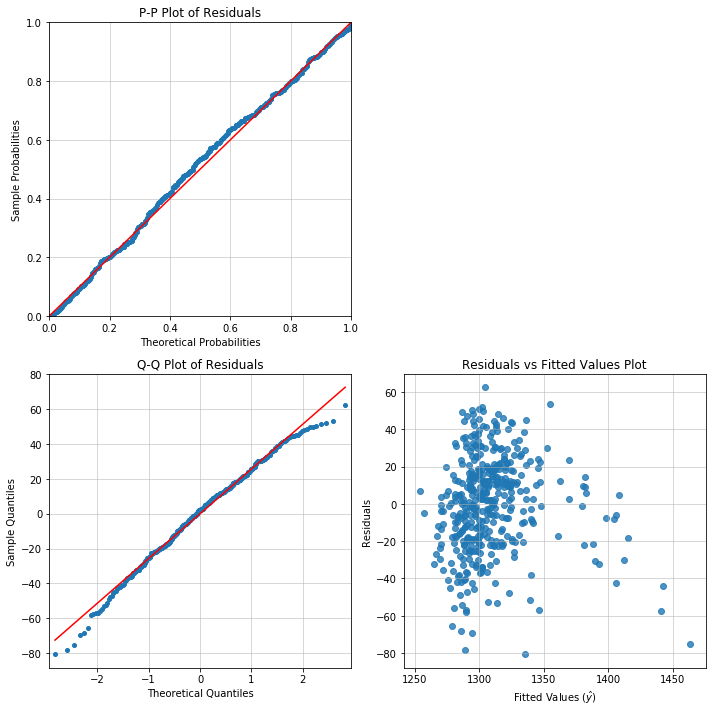

In [12]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 10))
model_nonrobust.diagnostic_plot('pp_plot', ax=axarr[0][0])
model_nonrobust.diagnostic_plot('qq_plot', ax=axarr[1][0])
model_nonrobust.diagnostic_plot('rvf_plot', ax=axarr[1][1])
axarr[0, 1].axis('off')
plt.tight_layout()

Oh dear.  The model specified has particular problems with test scores of 1350 and above.

There appears to be non-constance variance in the RVF plot.

Perhaps there is heteroskedasticity too, but we could do more specific tests there.

## Heteroskedasticity

In [13]:
from appelpy.diagnostics import heteroskedasticity_test

Call one of a few **heteroskedasticity tests**, e.g.:
- *Breusch-Pagan* (default of Stata's `hettest` command)
- *Bresuch-Pagan studentized* (default of R's `bptest` command)
- *White* (Stata's `hettest, white` command)

In [14]:
bp_stats = heteroskedasticity_test('breusch_pagan', model_nonrobust)
print('Breusch-Pagan test :: {}'.format(bp_stats['distribution'] + '({})'.format(bp_stats['nu'])))
print('Test statistic: {:.4f}'.format(bp_stats['test_stat']))
print('Test p-value: {:.4f}'.format(bp_stats['p_value']))

Breusch-Pagan test :: chi2(1)
Test statistic: 2.5579
Test p-value: 0.1097


In [15]:
bps_stats = heteroskedasticity_test('breusch_pagan_studentized', model_nonrobust)
print('Breusch-Pagan test (studentized) :: {}'.format(bps_stats['distribution'] + '({})'.format(bps_stats['nu'])))
print('Test statistic: {:.4f}'.format(bps_stats['test_stat']))
print('Test p-value: {:.4f}'.format(bps_stats['p_value']))

Breusch-Pagan test (studentized) :: chi2(1)
Test statistic: 11.3877
Test p-value: 0.0225


The studentized Breusch-Pagan test is seen as more robust and is showing a significant difference from the initial hypothesis of homoskedasticity, so let's fit a model with heteroskedastic-robust standard errors (`HC1` errors).

In [16]:
model_hc1 = OLS(df, y_list, X_list, cov_type='HC1').fit()

In [17]:
model_hc1.results_output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 scrtot   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     78.60
Date:                Fri, 03 Jan 2020   Prob (F-statistic):           1.36e-49
Time:                        21:38:44   Log-Likelihood:                -1959.6
No. Observations:                 420   AIC:                             3929.
Df Residuals:                     415   BIC:                             3949.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1312.9203     29.364     44.711      0.000    1255.367    1370.474
avginc         3.8640      0.240     16.119      0.000       3.394       4.334
str           -1.3954      0.932     -1.498      0.134      -3.221       0.430
enrltot       -0.0016      0.000     -5.794      0.000      -0.002      -0.001
expnstu       -0.0061      0.003     -2.166      0.030      -0.012      -0.001
==============================================================================
Omnibus:                        7.321   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.438
Skew:                          -0.326   Prob(JB):                       0.0243
Kurtosis:                       2.969   Cond. No.                     1.39e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What are the significant regressors (independent variables) now?

In [18]:
model_hc1.significant_regressors(0.05)

['avginc', 'enrltot', 'expnstu']

The `str` (student-teacher ratio) and `expnstu` regressors specifically relate to investment in students.  We can do a **Wald test** to test whether the two regressors together are significantly different from 0.

In [19]:
from appelpy.diagnostics import wald_test

In [20]:
wald_stats = wald_test(model_hc1, ['str', 'expnstu'])
print('Wald test :: {}'.format(wald_stats['distribution'] + '({})'.format(wald_stats['nu'])))
print('Test statistic: {:.4f}'.format(wald_stats['test_stat']))
print('Test p-value: {:.4f}'.format(wald_stats['p_value']))

Wald test :: chi2(2)
Test statistic: 4.7352
Test p-value: 0.0937


It's unsurprising that the standard errors for some of the variables are higher for HC1 errors compared to non-robust errors.

In [21]:
pd.concat([pd.Series(model_nonrobust.results.bse, name='std_error_nonrobust'),
           pd.Series(model_hc1.results.bse, name='std_error_hc1')], axis='columns')

,std_error_nonrobust,std_error_hc1
const,27.833430,29.364467
avginc,0.185093,0.239715
str,0.892703,0.931541
enrltot,0.000341,0.000278
expnstu,0.002613,0.002794


## Unusual observations: leverage, outliers and influence

Let's inspect observations that have:
- High influence
- High leverage
- Outlier value

In [22]:
from appelpy.diagnostics import BadApples

Set up an instance of `BadApples` with the model object.

In [23]:
bad_apples = BadApples(model_hc1).fit()

Let's plot the leverage values against the normalized residuals squared.

Observations in the top-right quadrant have leverage values and residual values higher than the average (i.e. they are the most influential in the model).

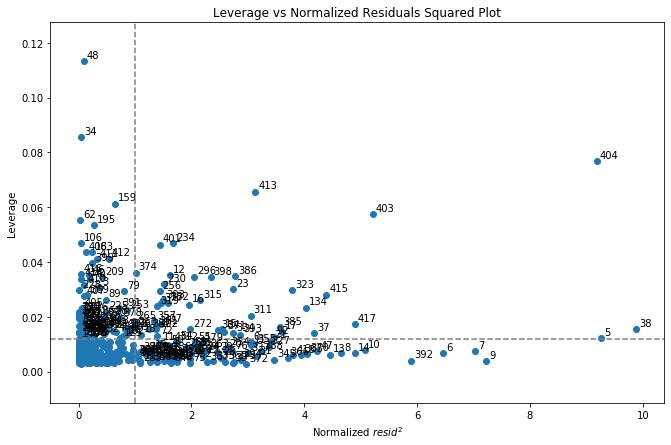

In [24]:
fig, ax = plt.subplots(figsize=(11,7))
bad_apples.plot_leverage_vs_residuals_squared(annotate=True)
plt.show()

### Leverage

The leverage values are stored in the `measures_leverage` attribute.

In [25]:
bad_apples.measures_leverage.sort_values(ascending=False).head()

48     0.113247
34     0.085633
404    0.076762
413    0.065741
159    0.061353
Name: leverage, dtype: float64

Let's look at the five observations with highest leverage.

In [26]:
bad_apples.show_extreme_observations().loc[[48,34,404,413,159]]

,scrtot,avginc,str,enrltot,expnstu
48,1261.099976,12.109128,19.017494,27176,5864.366211
34,1252.200012,11.722225,21.194069,25151,5117.039551
404,1387.900024,55.327999,16.262285,1059,6460.657227
413,1398.200012,50.676998,15.407042,687,7217.263184
159,1294.500000,14.298300,20.291372,21338,5123.474121


In [27]:
model_hc1.X_standardized.loc[[48,34,404,413,159]]

,avginc,str,enrltot,expnstu
48,-0.443884,-0.329278,6.273077,0.870684
34,-0.497428,0.821246,5.755585,-0.308182
404,5.537230,-1.785664,-0.401163,1.811299
413,4.893572,-2.237740,-0.496228,3.004803
159,-0.140922,0.344087,4.781167,-0.298032


These high-leverage points have at least one independent variable with a value > 4 standard deviations away from the mean.

### Outliers

The BadApples object calculates heuristics for determining whether values of measures are 'extreme'.

The extreme indices are stored in attributes, e.g. outliers stored in `indices_outliers`.

In [28]:
bad_apples.indices_outliers

[5, 6, 7, 8, 9, 10, 13, 14, 37, 38, 47, 134, 370, 392, 403, 404, 415, 417]

The heuristic for outliers: an observation is an outlier if either the absolute value of the standardized residual or absolute value of the studentized residual is higher than 2.

In [29]:
len(bad_apples.indices_outliers) / len(df)

0.04285714285714286

By that heuristic, we'd expect (by design) no more than around 5% of the observations to be viewed as outliers.

### Influence

Also consider a range of influence measures, e.g. Cook's distance, dffits and dfbeta.

In [30]:
bad_apples.measures_influence.sort_values('cooks_d', ascending=False).head()

,dfbeta_const,dfbeta_avginc,dfbeta_str,dfbeta_enrltot,dfbeta_expnstu,cooks_d,dffits_internal,dffits
404,0.010742,-0.811324,0.068295,0.061925,0.039761,0.152768,-0.873981,-0.882753
403,0.024082,-0.529623,0.016131,0.031978,0.026944,0.063718,-0.564440,-0.567338
413,0.074297,-0.373064,0.013021,0.033955,-0.099557,0.044116,-0.469661,-0.470876
38,-0.277356,-0.193382,0.217223,-0.136237,0.315817,0.030955,-0.393412,-0.397701
415,-0.157629,0.099707,0.045684,-0.026836,0.249169,0.025414,0.356468,0.357936


# Summary

- Load your dataset and do your pre-processing with Pandas.
- Appelpy **`eda`**: inspect your model dataset with handy functions, e.g. statistical moments.
- Appelpy **modelling**: `linear_model` contains classes such as OLS and WLS for model estimation.  Use a short recipe for each model and access model estimates, e.g. `results_output` and `results_output_standardized`.
- Appelpy **`diagnostics`**: check whether the model estimates are valid with diagnostics, e.g. diagnostic plots, statistical tests and `BadApples` for influence analysis.

Other features worth checking out:
- Logistic regression (under `discrete_model`)
- DummyEncoder and InteractionEncoder classes